# Scikit-learn
What we're going to cover:
1. An end-to-end Scikit-Learn workflow
2. Getting the data ready
3. Choose the right estimator/algorithm for our problems
4. Fit the model/algorithm and use it to make predictions on our data
5. Evaluating a model
6. Improve a model
7. Save and load a trained model
8. Put it all together!

In [8]:
## 1. An end-to-end Scikit-Learn workflow
import pandas as pd
import numpy as np

# 2. Getting the data ready
heart_disease = pd.read_csv('scikit-learn-data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [5]:
# 3. Choose the right model and hyperparameters
# RandomForestClassifier -> a classifying algorithm
from sklearn.ensemble import RandomForestClassifier

# Create classifier "clf"
clf = RandomForestClassifier()

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 4. Fit the model to the training data
from sklearn.model_selection import train_test_split

# Split data into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train);

In [9]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [10]:
# 5. Evaluate the model on the training and test data
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.7868852459016393

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        23
           1       0.88      0.76      0.82        38

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.80      0.79      0.79        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[19,  4],
       [ 9, 29]])

In [14]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [17]:
# 6. Improve a model
# Try a different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100}')
    print('')

Trying model with 10 estimators...
Model accuracy on test set: 73.77049180327869

Trying model with 20 estimators...
Model accuracy on test set: 78.68852459016394

Trying model with 30 estimators...
Model accuracy on test set: 73.77049180327869

Trying model with 40 estimators...
Model accuracy on test set: 78.68852459016394

Trying model with 50 estimators...
Model accuracy on test set: 78.68852459016394

Trying model with 60 estimators...
Model accuracy on test set: 75.40983606557377

Trying model with 70 estimators...
Model accuracy on test set: 75.40983606557377

Trying model with 80 estimators...
Model accuracy on test set: 67.21311475409836

Trying model with 90 estimators...
Model accuracy on test set: 78.68852459016394



In [18]:
# 7. Save a model and load it
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [21]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.7868852459016393

## Getting the Data Ready

Three main things we need to do:
   1. Split the data into features and labels (usually `X` and `y`)
   2. Filling (also called imputing) or disregarding missing values
   3. Converting non-numerical values to numerical values (feature encoding)

In [23]:
# standard imports
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X = heart_disease.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# NEVER EVALUATE OR TEST ON DATA IT HAS LEARNED FROM

In [29]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure all data is numerical

In [32]:
car_sales = pd.read_csv('scikit-learn-data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
len(car_sales)

1000

In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

Trying the data !!!WITHOUT!!! updating numerical values

In [35]:
# Split into X/y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# Split into training/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# Build machine learning model
# RFR guesses a number
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

Lets fix the numbers now

In [40]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [41]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [43]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [46]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [47]:
# Import car sales missing data
car_sales_missing = pd.read_csv('scikit-learn-data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [49]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
# Create X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [51]:
# Let's try and convert to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1: Fill missing data with pandas

In [53]:
# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the 'Colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the 'Odometer' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the missing 'Door' column
car_sales_missing['Doors'].fillna(4, inplace=True)


In [55]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [56]:
# Remove rows with missing price values
car_sales_missing.dropna(inplace=True)

In [57]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [58]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [61]:
# Let's try and convert to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

#### Option 2: Fill missing values with scikit-learn

In [62]:
car_sales_missing = pd.read_csv('scikit-learn-data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [63]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [64]:
# Drop rows with no data
car_sales_missing.dropna(subset=['Price'], inplace=True)

In [65]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [66]:
# Split into X & Y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [71]:
# Handle test data
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features =  ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])
filled_X = imputer.fit_transform(X)
filled_X


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [72]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

In [73]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

## Choose the right estimator/algorithm for your problem
Some things to note:
- Sklearn refers to ML models, algorithms as estimators
- Classification problem: Predicting a category (heart disease or not)
    - Sometimes you'll see `clf` (short for classifier) used as a classification estimator
- Regression problem: Predicting a number (car sales price)

### 2.1 Picking a machine learning model for a regression problem
Let's use the California Housing Dataset

In [75]:
# Get CA housing data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [79]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [84]:
housing_df['target'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [85]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [86]:
# Import the algorithm
from sklearn.linear_model import Ridge

# Set up the random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target'] # Median house price in 100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model on the TRAIN set
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model on the TEST set
model.score(X_test, y_test)

0.5758549611440126

What if Ridge didn't work or the score didn't fit our needs?

We could try a different model...

How about an ensemble model?
    - A combination of smaller models to make a better prediction than just a single model

In [88]:
# Import RFR
from sklearn.ensemble import RandomForestRegressor

# Set up random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create RF model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8059809073051385

### 2.2 Picking a machine learning model for a classification problem

In [89]:
heart_disease = pd.read_csv('scikit-learn-data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
len(heart_disease)

303

In [93]:
# Import the LinearSVC estimator
from sklearn.svm import LinearSVC

# Set up random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate
clf.score(X_test, y_test)

/Users/kerricrawford/udemy/machine-learning/sample-project/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [95]:
# Import RFR
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create RF model
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

## Fit the model/algorithm and use it to make predictions on our data
Different names for:
- `X` = features, feature variables, data
- `y` = labels, targets, target variables

In [96]:
### Fitting the model to the data
# Import RFR
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create RF model
model = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate
model.score(X_test, y_test)

0.8524590163934426

### Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [98]:
# Use a trained model to make predictions
clf.predict(np.array[1, 7, 8, 4]) # this won't work

TypeError: 'builtin_function_or_method' object is not subscriptable

In [99]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [100]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [101]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [102]:
clf.score(X_test, y_test)

0.8688524590163934

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

### predict() vs predict_proba()
- predict_proba returns probabilities of a classification label

In [109]:
clf._predict_proba_lr(X_test)

array([[0.61990682, 0.38009318],
       [0.31915885, 0.68084115],
       [0.24886537, 0.75113463],
       [0.71506712, 0.28493288],
       [0.28459539, 0.71540461],
       [0.24394526, 0.75605474],
       [0.3890545 , 0.6109455 ],
       [0.85691846, 0.14308154],
       [0.79064311, 0.20935689],
       [0.38576252, 0.61423748],
       [0.33605327, 0.66394673],
       [0.60502202, 0.39497798],
       [0.27108317, 0.72891683],
       [0.64532871, 0.35467129],
       [0.17723456, 0.82276544],
       [0.20548272, 0.79451728],
       [0.18184298, 0.81815702],
       [0.62461865, 0.37538135],
       [0.78244872, 0.21755128],
       [0.70844964, 0.29155036],
       [0.31760505, 0.68239495],
       [0.73643261, 0.26356739],
       [0.63881133, 0.36118867],
       [0.37787756, 0.62212244],
       [0.28491414, 0.71508586],
       [0.33062653, 0.66937347],
       [0.31433177, 0.68566823],
       [0.31636219, 0.68363781],
       [0.76909083, 0.23090917],
       [0.27743904, 0.72256096],
       [0.

In [110]:
# predict() can also be used for regression model

In [111]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [112]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [113]:
y_preds

array([0.49058  , 0.75989  , 4.9350165, ..., 4.8539888, 0.71491  ,
       1.66568  ])

## Evaluating a model

Three ways to evaluate Scikit-Learn models/estimators
1. Estimator's built in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

### Evaluating a model with the `score` method

In [127]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# Fit classifier to training data
clf.fit(X_train, y_train);

In [128]:
clf.score(X_train, y_train) # The highest value is 1.0, lowest is 0.0

1.0

In [129]:
clf.score(X_test, y_test)

0.8524590163934426

Lets use the score method on our regression problem

In [132]:
from sklearn.ensemble import RandomForestRegressor

# set random seed
np.random.seed(42)

# Create X&y
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split data
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

# Create instance of model
model = RandomForestRegressor(n_estimators=100)

# fit the model
model.fit(X_train, y_train)

# score
model.score(X_test, y_test)

0.7682944577757367

## Evaluating a model using the `scoring` parameter

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# Fit classifier to training data
clf.fit(X_train, y_train);

In [134]:
clf.score(X_test, y_test)

0.8524590163934426

In [136]:
cross_val_score(clf, X, y, cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [137]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [140]:
# Scoring parameter set to none by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.8852459 , 0.83606557, 0.81666667, 0.76666667])

### Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)
clf_cross_val_score = cross_val_score(clf, X, y, cv=5)

print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(clf_cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### Area under Receiver Operating Curve (AUC/ROC)
- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = model predicts 1 when the truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when the truth is 0
* False negative = model predicts 0 when the truth is 1

In [151]:
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs

array([[0.69, 0.31],
       [0.58, 0.42],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.28, 0.72],
       [0.9 , 0.1 ],
       [0.39, 0.61],
       [0.11, 0.89],
       [0.07, 0.93],
       [0.86, 0.14],
       [0.01, 0.99],
       [0.43, 0.57],
       [0.52, 0.48],
       [0.  , 1.  ],
       [0.65, 0.35],
       [0.97, 0.03],
       [0.7 , 0.3 ],
       [0.26, 0.74],
       [0.11, 0.89],
       [0.61, 0.39],
       [0.17, 0.83],
       [0.93, 0.07],
       [0.67, 0.33],
       [1.  , 0.  ],
       [0.68, 0.32],
       [0.93, 0.07],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.31, 0.69],
       [0.86, 0.14],
       [0.3 , 0.7 ],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.42, 0.58],
       [0.53, 0.47],
       [0.84, 0.16],
       [0.78, 0.22],
       [0.12, 0.88],
       [0.12, 0.88],
       [0.81, 0.19],
       [0.53, 0.47],
       [0.86, 0.14],
       [0.5 , 0.5 ],
       [0.14, 0.86],
       [0.99, 0.01],
       [0.52,

In [153]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.31, 0.42, 0.08, 0.92, 0.93, 0.97, 0.72, 0.1 , 0.61, 0.89, 0.93,
       0.14, 0.99, 0.57, 0.48, 1.  , 0.35, 0.03, 0.3 , 0.74, 0.89, 0.39,
       0.83, 0.07, 0.33, 0.  , 0.32, 0.07, 0.99, 0.97, 0.69, 0.14, 0.7 ,
       0.8 , 0.78, 0.58, 0.47, 0.16, 0.22, 0.88, 0.88, 0.19, 0.47, 0.14,
       0.5 , 0.86, 0.01, 0.48, 0.59, 0.63, 0.03, 0.41, 0.9 , 0.87, 0.93,
       0.84, 0.11, 0.56, 0.17, 0.18, 0.94])

In [155]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03703704, 0.03703704,
       0.07407407, 0.07407407, 0.11111111, 0.11111111, 0.14814815,
       0.14814815, 0.22222222, 0.2962963 , 0.2962963 , 0.33333333,
       0.33333333, 0.48148148, 0.48148148, 0.59259259, 0.7037037 ,
       0.81481481, 0.85185185, 0.92592593, 1.        ])

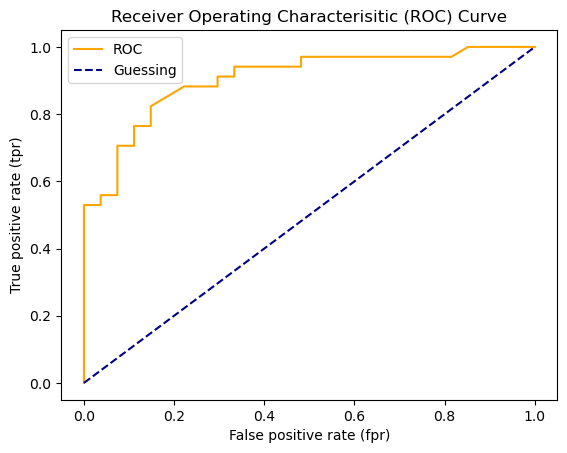

In [158]:
# Create a function for platting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # Plot curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')

    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characterisitic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [160]:
from sklearn.metrics import roc_auc_score
# AUC = area under curve

roc_auc_score(y_test, y_probs_positive)

0.9046840958605664

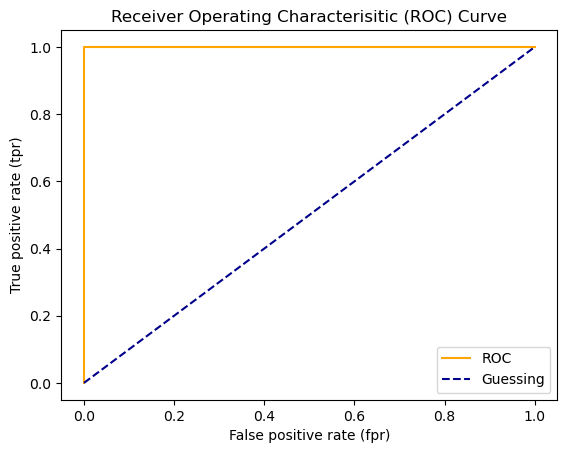

In [161]:
# Plot perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [162]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

#### Confusion Matrix

A quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea where the model is getting confused

In [163]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 7, 27]])

In [165]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,4
1,7,27


| 23 |  4 |
| 7  | 27 |

26, 26 = true positives, true negatives
6, 3 = false positives, false negatives

<Axes: >

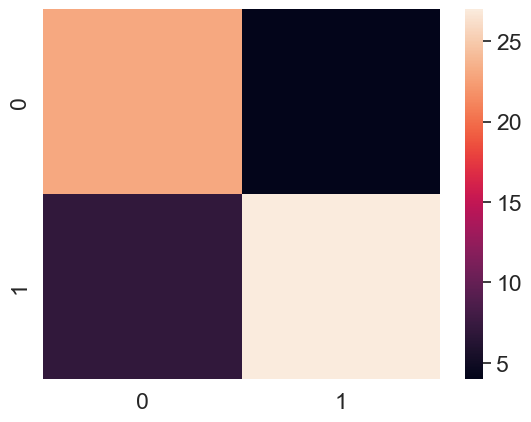

In [176]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
# Plot it
sns.heatmap(conf_mat)

### Classification Report

In [178]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## Regression model evaluation methods

The ones we are going to cover are:
1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [183]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train);

In [184]:
model.score(X_test, y_test)

0.8067501287216554

In [186]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

### Mean Absolute Error
- the average of the absolute differences between predictions and actual values

It gives you an idea of how wrong your predictions are

In [188]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3288237696899226

In [189]:
df = pd.DataFrame(data={'actual values': y_test, 'predicted values': y_preds})
df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
20046,0.47700,0.494290,0.017290
3024,0.45800,0.731130,0.273130
15663,5.00001,4.867407,-0.132603
20484,2.18600,2.640340,0.454340
9814,2.78000,2.330830,-0.449170
...,...,...,...
5363,5.00001,4.588855,-0.411155
19755,0.63200,0.775490,0.143490
4885,1.17700,1.279080,0.102080
13043,2.63100,2.925340,0.294341
